# Initialization

Обучение вашей нейронной сети требует указания начального значения весов. Хорошо подобранный метод инициализации поможет в обучении.

Хорошо подобранная инициализация может:
- Ускорить сходимость градиентного спуска
- Увеличение вероятности градиентного спуска, сходящегося к более низкой ошибке обучения (и обобщения)

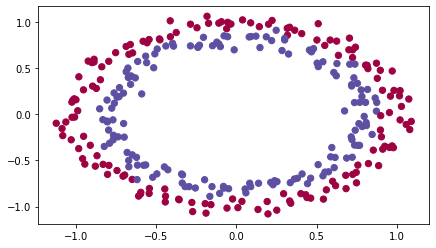

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # plots size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()

## Neural Network model 

Вы будете использовать 3-слойную нейронную сеть (уже реализованную). Вот методы инициализации, с которыми вы будете экспериментировать:
- *Zeros initialization* - установка `initialization = "zeros "`  в качестве входного аргумента.
- *Random initialization* - установка `initialization = "random"`  в качестве входного аргумента. Это инициализирует веса до больших случайных значений.
-  *He initialization*  - установка `initialization = "he"` в качестве входного аргумента. Это инициализирует веса до случайных величин, масштабированных в соответствии с работой He et al., 2015. 

**Инструкции**: В следующей части вы реализуете три метода инициализации, которые вызывает эта модель

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Реализует трехслойную нейронную сеть: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    X -- входные дданные shape =  (2, количество примеров)
    Y -- целевые переменные {0 - red dots; 1 - blue dots}, shape =  (1, количество примеров)
    learning_rate -- скорость обучения для обновления градиентного спуска
    num_iterations -- количество итераций цикла оптимизации
    print_cost -- если True, то он печатает cost каждые 100 шагов
    initialization -- {"zeros","random", "he"} флаг для выбора используемой инициализации 
    
    returns: parameters - параметры, изучаемые моделью. Затем они могут быть использованы для предсказания.
    """
        
    grads = {}
    costs = [] # чтобы отслеживать потери
    m = X.shape[1] # количество примеров
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations+1):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        ## Loss
        cost = compute_loss(a3, Y)

        ## Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        ## Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.4}")
            costs.append(cost)
            
    # plot loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Zero initialization

Существует два типа параметров для инициализации в нейронной сети:
- weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Упражнение**: реализуйте следующую функцию для инициализации всех параметров в нули. Позже вы увидите, что это не очень хорошо работает, так как он не может "нарушить симметрию", но давайте все равно попробуем и посмотрим, что получится.

In [3]:
def initialize_parameters_zeros(layers_dims):
    """
    layer_dims (list) содержащий размер каждого слоя.

    returns: parameters (dict) содержащий параметры "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector   shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector   shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims) # количество слоев в сети
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])

print ("\nW1 = \n", parameters["W1"])
print ("\nb1 =", *parameters["b1"])
print ("W2 =", *parameters["W2"])
print ("b2 =", *parameters["b2"])


W1 = 
 [[0. 0. 0.]
 [0. 0. 0.]]

b1 = [0.] [0.]
W2 = [0. 0.]
b2 = [0.]


Выполните следующий код для обучения модели на 15 000 итерациях с использованием zeros initialization.

Cost after iteration 0: 0.6931
Cost after iteration 1000: 0.6931
Cost after iteration 2000: 0.6931
Cost after iteration 3000: 0.6931
Cost after iteration 4000: 0.6931
Cost after iteration 5000: 0.6931
Cost after iteration 6000: 0.6931
Cost after iteration 7000: 0.6931
Cost after iteration 8000: 0.6931
Cost after iteration 9000: 0.6931
Cost after iteration 10000: 0.6931
Cost after iteration 11000: 0.6931
Cost after iteration 12000: 0.6931
Cost after iteration 13000: 0.6931
Cost after iteration 14000: 0.6931
Cost after iteration 15000: 0.6931


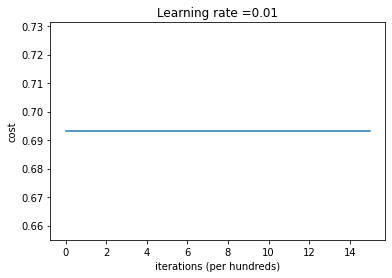

On the train set:
Accuracy: 50.00% 
On the test set:
Accuracy: 50.00% 


In [5]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:

In [6]:
print ("predictions_train = \n", predictions_train)
print ("\npredictions_test = \n",    predictions_test)

predictions_train = 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]

predictions_test = 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


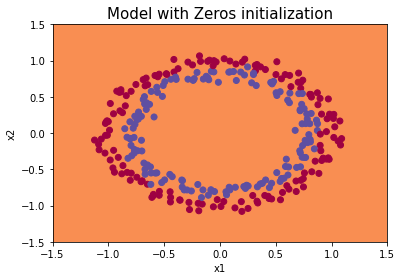

In [7]:
plt.title("Model with Zeros initialization", size=15)
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Модель предсказывает 0 для каждого примера.

В общем случае инициализация всех весов до нуля приводит к тому, что сеть не может нарушить симметрию. Это означает, что каждый нейрон в каждом слое будет изучать одно и то же, и вы можете с таким же успехом обучать нейронную сеть с $n^{[l]}=1$ для каждого слоя, и эта сеть не более мощна, чем линейный классификатор, такой как логистическая регрессия.

<font color='blue'>
**Что вы должны помнить**:
- Веса $W^{[l]}$ должны быть инициализированы случайным образом, чтобы нарушить симметрию.
- Однако можно инициализировать смещения $b^{[l]}$ в нули. Симметрия все еще нарушается до тех пор, пока $W^{[l]}$ инициализируется случайным образом.

## Random initialization

Чтобы нарушить симметрию, давайте инициализируем веса случайным образом. После случайной инициализации каждый нейрон может затем перейти к изучению другой функции своих входных сигналов. В этом упражнении вы увидите, что происходит, если веса инициализируются случайным образом, но с очень большими значениями.

**Упражнение**: реализуйте следующую функцию для инициализации ваших весов до больших случайных величин (масштабированных на \ * 10) и ваших смещений до нулей. Используйте`np.random.randn(..,..) * 10` для Весов и `np.zeros((.., ..))` для смещений.

In [8]:
def initialize_parameters_random(layers_dims):
    """
    layer_dims (list) содержащий размер каждого слоя.

    returns: parameters (dict) содержащий параметры "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector   shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector   shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)  # количество слоев в сети

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print ("\nW1 = \n", parameters["W1"])
print ("\nb1 =", *parameters["b1"])
print ("W2 =", *parameters["W2"])
print ("b2 =", *parameters["b2"])


W1 = 
 [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]

b1 = [0.] [0.]
W2 = [-0.82741481 -6.27000677]
b2 = [0.]


Выполните следующий код для обучения модели на 15 000 итерациях с использованием random initialization.

Cost after iteration 0: inf
Cost after iteration 1000: 0.6248
Cost after iteration 2000: 0.598
Cost after iteration 3000: 0.5638
Cost after iteration 4000: 0.5501
Cost after iteration 5000: 0.5444
Cost after iteration 6000: 0.5374
Cost after iteration 7000: 0.4716
Cost after iteration 8000: 0.3977
Cost after iteration 9000: 0.3935
Cost after iteration 10000: 0.392
Cost after iteration 11000: 0.3891
Cost after iteration 12000: 0.3861
Cost after iteration 13000: 0.385
Cost after iteration 14000: 0.3828
Cost after iteration 15000: 0.3811


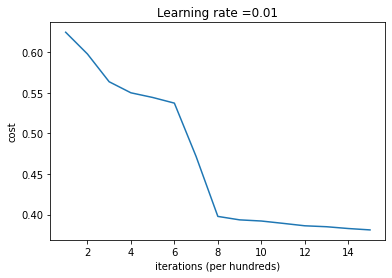

On the train set:
Accuracy: 83.00% 
On the test set:
Accuracy: 86.00% 


In [22]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

В любом случае, похоже, что вы нарушили симметрию, и это дает лучшие результаты. чем раньше. Модель больше не выводит все 0s.

In [23]:
print(*predictions_train)
print(*predictions_test)

[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 0]
[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]


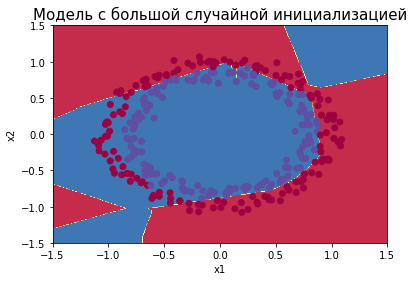

In [24]:
plt.title("Модель с большой случайной инициализацией", size=15)
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Наблюдательные данные**:
- Стоимость сначала очень высока. Это происходит потому, что при больших случайных Весах последняя активация (сигмоида) выводит результаты, которые очень близки к 0 или 1 для некоторых примеров, и когда он получает этот пример неправильно, он несет очень большие потери для этого примера. Действительно, когда $\log(a^{[3]}) = \log (0)$, потери уходят в бесконечность.
- Плохая инициализация может привести к исчезновению / взрыву градиентов, что также замедляет алгоритм оптимизации.
- Если вы будете тренировать эту сеть дольше, то увидите лучшие результаты, но инициализация с чрезмерно большими случайными числами замедляет оптимизацию.

<font color='blue'>
**В заключение**:
- Инициализация весов до очень больших случайных величин плохо работает.
- Надеюсь, инициализация с небольшими случайными значениями будет лучше. Важный вопрос заключается в следующем: насколько малыми должны быть эти случайные величины? Давайте узнаем об этом!.

## He initialization

Наконец, попробуйте "He Initialization"; она названа в честь первого автора He et al., 2015. (Если вы слышали о "Xavier initialization", то это похоже, за исключением того, что Xavier initialization использует масштабирующий коэффициент для Весов $W^{[l]}$ `sqrt(1./layers_dims[l-1])` где он будет использовать инициализацию `sqrt(2./layers_dims[l-1])`.)

**Упражнения**: реализовать следующие функции для инициализации параметров при помощи He initialization.

**Подсказка**: эта функция аналогична предыдущей `initialize_parameters_random(...)`. Единственное отличие заключается в том, что вместо умножения  `np.random.randn(..,..)` на 10 вы умножите его на $\sqrt {\frac{2} {\text{dimension of the previous layer}}}$, что *He* рекомендует для инициализации слоев с активацией ReLU.

In [20]:
def initialize_parameters_he(layers_dims):
    """
    layer_dims (list) содержащий размер каждого слоя.

    returns: parameters (dict) содержащий параметры "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector   shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector   shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) # количество слоев
     
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [17]:
parameters = initialize_parameters_he([2, 4, 1])
print ("\nW1 = \n", parameters["W1"])
print ("\nb1 =", *parameters["b1"])
print ("W2 =", *parameters["W2"])
print ("b2 =", *parameters["b2"])


W1 = 
 [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]

b1 = [0.] [0.] [0.] [0.]
W2 = [-0.03098412 -0.33744411 -0.92904268  0.62552248]
b2 = [0.]


Выполните следующий код, чтобы обучить вашу модель на 15 000 итераций с помощью He initialization.

Cost after iteration 0: 0.8831
Cost after iteration 1000: 0.688
Cost after iteration 2000: 0.6751
Cost after iteration 3000: 0.6526
Cost after iteration 4000: 0.6083
Cost after iteration 5000: 0.5305
Cost after iteration 6000: 0.4139
Cost after iteration 7000: 0.3118
Cost after iteration 8000: 0.237
Cost after iteration 9000: 0.186
Cost after iteration 10000: 0.1502
Cost after iteration 11000: 0.1233
Cost after iteration 12000: 0.09918
Cost after iteration 13000: 0.08457
Cost after iteration 14000: 0.07358
Cost after iteration 15000: 0.06481


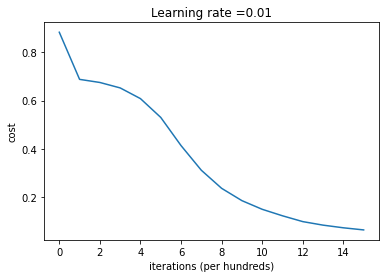

On the train set:
Accuracy: 99.33% 
On the test set:
Accuracy: 96.00% 


In [25]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


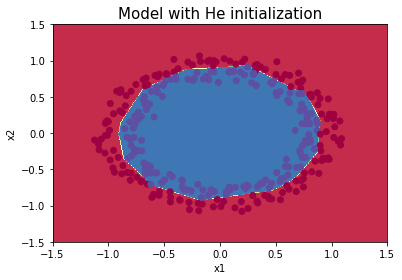

In [27]:
plt.title("Model with He initialization", size=15)
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## выводы

Вы видели три различных типа инициализации. Для одного и того же числа итераций и одних и тех же гиперпараметров сравнение выглядит следующим образом:
<table> 
    <tr>
        <td>
        **Model**
        </td>
        <td>
        **Train accuracy**
        </td>
        <td>
        **Problem/Comment**
        </td>

    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

<font color='blue'>
**Что вы должны помнить**:
- Разные инициализации приводят к разным результатам
- Случайная инициализация используется для того, чтобы нарушить симметрию и убедиться, что различные скрытые единицы могут изучать разные вещи
- Не интиализируйте значения, которые слишком велики
- He initialization хорошо работает для сетей с активацией ReLU.